# Introduction:
As a Data Analyst at Amazon, the task is to assess customer perception of the iPhone 15 (128GB) model by analyzing user-generated product reviews. Through sentiment analysis, this project aims to classify reviews as positive or negative and uncover patterns in customer opinions. The insights derived will support data-driven decision-making, help identify areas for improvement, and contribute to strengthening customer satisfaction and product strategy.

# 1. Data Collection (Web Scraping):

Tool: Selenium and BeautifulSoup

Task: Scrape at least 300 customer reviews from Flipkart's product page for the iPhone 15 128GB model.

**Steps:
Selenium was set up to automate browser interactions, navigate to Flipkart’s product page for the iPhone 15 128GB, and extract the reviews.

BeautifulSoup was used to parse the HTML content of the reviews and extract relevant details such as the username, rating, and review text.

The scraper was designed to handle pagination so that reviews from multiple pages could be retrieved as needed.

In [ ]:
# Selenium and BeautifulSoup

In [1]:
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.common.keys import Keys
import requests
import time


UserName = []
Rating = []
Review_Title = []
Review_Text  = []
City = []


url = """https://www.flipkart.com/apple-iphone-15-blue-128-gb/product-reviews/itmbf14ef54f645d?pid=MOBGTAGPAQNVFZZY&lid=LSTMOBGTAGPAQNVFZZY7RHDU7&marketplace=FLIPKART&page=10"""
driver = webdriver.Chrome()
driver.get(url)

while len(UserName)<400:
    try:
        soup = BeautifulSoup(driver.page_source, "html.parser")
    
    except:
        print("stopping loop")
    
    
    main = soup.find("div",{"class":"DOjaWF gdgoEp col-9-12"})

    sub = main.find_all("div",{"class":"col EPCmJX Ma1fCG"})

    for i in sub:
         Names= i.find("p",{"class":"_2NsDsF AwS1CA"})
         UserName.append(Names.text)

         try:
             Ratings = i.find("div",{"class":"XQDdHH Ga3i8K"})
             Rating.append(Ratings.text)
         except:
             Rating.append(np.nan)


         try:    
             Title = i.find("p",{"class":"z9E0IG"})
             Review_Title.append(Title.text)
         except:
             Review_Title.append(np.nan)

         try:    
             rev_text = i.find("div",{"class":"ZmyHeo"})
             Review_Text.append(rev_text.text)
         except:
             Review_Text.append(np.nan)

         try:        
             city = i.find("p",{"class":"MztJPv"})
             City.append(city.text)
         except:
             City.append(np.nan)
   
    
    time.sleep(3)
    
    try:
        Next = driver.find_element(By.XPATH, """//*[@id="container"]/div/div[3]/div/div/div[2]/div[13]/div/div/nav/a[12]/span""").click() 
        time.sleep(2)
    except:
        print("No next button. Ending loop.")
        break

In [2]:
df =pd.DataFrame({"UserName":UserName,"Rating":Rating,"Review_Title":Review_Title,"Review_Text":Review_Text,"City":City})
df

,UserName,Rating,Review_Title,Review_Text,City
0,Swarnima Customer,5,Classy product,I recently went on a trip with a friend who ha...,"Certified Buyer, Karimganj"
1,Aniket Zurange,5,Terrific purchase,I order smartphone from Flipkart. This is my 4...,"Certified Buyer, Pune"
2,jithu reddy,5,Fabulous!,Performance superREAD MORE,"Certified Buyer, Anantapur"
3,KALPESH SHIRSEKAR,5,Must buy!,Coming from iphone 12 mini.Camera is definitel...,"Certified Buyer, Mumbai"
4,Suraj Mehra,5,Just wow!,NiceREAD MORE,"Certified Buyer, Garhwa"
...,...,...,...,...,...
395,Rahul Ahirwar,5,Highly recommended,AwesomeREAD MORE,"Certified Buyer, New Delhi"
396,Harshit Prajapati,5,Terrific purchase,Thanks Apple ✨❤️READ MORE,"Certified Buyer, Bahraich"
397,Isha Rajput,5,Perfect product!,All quality are goodREAD MORE,"Certified Buyer, Gurugram"
398,Deepankar Srivastava,5,Just wow!,iphone is iphone best in qualityREAD MORE,"Certified Buyer, Bengaluru"


# 2. Data Cleaning and Preprocessing

Tool: Pandas

Task: Clean and preprocess the scraped data for analysis.



# Steps:
Removed duplicates: Eliminated duplicate reviews to maintain data quality.

Handled null values: Since the proportion of null values was very small, they were removed.

Performed text preprocessing:

Extracted and removed the word “READ” from the review text and converted all text to lowercase.

Removed the “Certified Buyer” label as it was irrelevant to the analysis.

In [3]:
df = df.copy()

df["Review_Text"]= df["Review_Text"].str.split("READ").str[0].str.strip().str.lower()
df

,UserName,Rating,Review_Title,Review_Text,City
0,Swarnima Customer,5,Classy product,i recently went on a trip with a friend who ha...,"Certified Buyer, Karimganj"
1,Aniket Zurange,5,Terrific purchase,i order smartphone from flipkart. this is my 4...,"Certified Buyer, Pune"
2,jithu reddy,5,Fabulous!,performance super,"Certified Buyer, Anantapur"
3,KALPESH SHIRSEKAR,5,Must buy!,coming from iphone 12 mini.camera is definitel...,"Certified Buyer, Mumbai"
4,Suraj Mehra,5,Just wow!,nice,"Certified Buyer, Garhwa"
...,...,...,...,...,...
395,Rahul Ahirwar,5,Highly recommended,awesome,"Certified Buyer, New Delhi"
396,Harshit Prajapati,5,Terrific purchase,thanks apple ✨❤️,"Certified Buyer, Bahraich"
397,Isha Rajput,5,Perfect product!,all quality are good,"Certified Buyer, Gurugram"
398,Deepankar Srivastava,5,Just wow!,iphone is iphone best in quality,"Certified Buyer, Bengaluru"


In [4]:
df["City"] = df["City"].str.replace("Certified Buyer, ","",regex=False).str.strip()
df

,UserName,Rating,Review_Title,Review_Text,City
0,Swarnima Customer,5,Classy product,i recently went on a trip with a friend who ha...,Karimganj
1,Aniket Zurange,5,Terrific purchase,i order smartphone from flipkart. this is my 4...,Pune
2,jithu reddy,5,Fabulous!,performance super,Anantapur
3,KALPESH SHIRSEKAR,5,Must buy!,coming from iphone 12 mini.camera is definitel...,Mumbai
4,Suraj Mehra,5,Just wow!,nice,Garhwa
...,...,...,...,...,...
395,Rahul Ahirwar,5,Highly recommended,awesome,New Delhi
396,Harshit Prajapati,5,Terrific purchase,thanks apple ✨❤️,Bahraich
397,Isha Rajput,5,Perfect product!,all quality are good,Gurugram
398,Deepankar Srivastava,5,Just wow!,iphone is iphone best in quality,Bengaluru


In [5]:
df["Review_Text"].duplicated().sum()

np.int64(15)

In [6]:
df = df.drop_duplicates(subset = "Review_Text")
df

,UserName,Rating,Review_Title,Review_Text,City
0,Swarnima Customer,5,Classy product,i recently went on a trip with a friend who ha...,Karimganj
1,Aniket Zurange,5,Terrific purchase,i order smartphone from flipkart. this is my 4...,Pune
2,jithu reddy,5,Fabulous!,performance super,Anantapur
3,KALPESH SHIRSEKAR,5,Must buy!,coming from iphone 12 mini.camera is definitel...,Mumbai
4,Suraj Mehra,5,Just wow!,nice,Garhwa
...,...,...,...,...,...
395,Rahul Ahirwar,5,Highly recommended,awesome,New Delhi
396,Harshit Prajapati,5,Terrific purchase,thanks apple ✨❤️,Bahraich
397,Isha Rajput,5,Perfect product!,all quality are good,Gurugram
398,Deepankar Srivastava,5,Just wow!,iphone is iphone best in quality,Bengaluru


In [7]:
df.isnull().sum()

UserName        0
Rating          1
Review_Title    0
Review_Text     0
City            0
dtype: int64

In [8]:
df = df.dropna()
df

,UserName,Rating,Review_Title,Review_Text,City
0,Swarnima Customer,5,Classy product,i recently went on a trip with a friend who ha...,Karimganj
1,Aniket Zurange,5,Terrific purchase,i order smartphone from flipkart. this is my 4...,Pune
2,jithu reddy,5,Fabulous!,performance super,Anantapur
3,KALPESH SHIRSEKAR,5,Must buy!,coming from iphone 12 mini.camera is definitel...,Mumbai
4,Suraj Mehra,5,Just wow!,nice,Garhwa
...,...,...,...,...,...
395,Rahul Ahirwar,5,Highly recommended,awesome,New Delhi
396,Harshit Prajapati,5,Terrific purchase,thanks apple ✨❤️,Bahraich
397,Isha Rajput,5,Perfect product!,all quality are good,Gurugram
398,Deepankar Srivastava,5,Just wow!,iphone is iphone best in quality,Bengaluru


In [9]:
df = df.copy()

df["UserName"] = df["UserName"].str.title()
df

,UserName,Rating,Review_Title,Review_Text,City
0,Swarnima Customer,5,Classy product,i recently went on a trip with a friend who ha...,Karimganj
1,Aniket Zurange,5,Terrific purchase,i order smartphone from flipkart. this is my 4...,Pune
2,Jithu Reddy,5,Fabulous!,performance super,Anantapur
3,Kalpesh Shirsekar,5,Must buy!,coming from iphone 12 mini.camera is definitel...,Mumbai
4,Suraj Mehra,5,Just wow!,nice,Garhwa
...,...,...,...,...,...
395,Rahul Ahirwar,5,Highly recommended,awesome,New Delhi
396,Harshit Prajapati,5,Terrific purchase,thanks apple ✨❤️,Bahraich
397,Isha Rajput,5,Perfect product!,all quality are good,Gurugram
398,Deepankar Srivastava,5,Just wow!,iphone is iphone best in quality,Bengaluru


In [12]:
df.to_csv("Project_sentiment_analysis.csv")

# 3. Sentiment Analysis:

Tool: TextBlob

Task: Analyze the sentiment of each review to classify them as either positive or negative.

In [3]:
from textblob import TextBlob
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import sent_tokenize
from nltk.tokenize import word_tokenize
import string

nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to C:\Users\Girish
[nltk_data]     Poojary\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to C:\Users\Girish
[nltk_data]     Poojary\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to C:\Users\Girish
[nltk_data]     Poojary\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [4]:
import pandas as pd

In [5]:
df=pd.read_csv("Project_sentiment_analysis.csv", index_col=0)
df

,UserName,Rating,Review_Title,Review_Text,City
0,Swarnima Customer,5,Classy product,i recently went on a trip with a friend who ha...,Karimganj
1,Aniket Zurange,5,Terrific purchase,i order smartphone from flipkart. this is my 4...,Pune
2,Jithu Reddy,5,Fabulous!,performance super,Anantapur
3,Kalpesh Shirsekar,5,Must buy!,coming from iphone 12 mini.camera is definitel...,Mumbai
4,Suraj Mehra,5,Just wow!,nice,Garhwa
...,...,...,...,...,...
395,Rahul Ahirwar,5,Highly recommended,awesome,New Delhi
396,Harshit Prajapati,5,Terrific purchase,thanks apple ✨❤️,Bahraich
397,Isha Rajput,5,Perfect product!,all quality are good,Gurugram
398,Deepankar Srivastava,5,Just wow!,iphone is iphone best in quality,Bengaluru


In [6]:
df["reviews"] = df['Review_Text'].apply(sent_tokenize)
df

,UserName,Rating,Review_Title,Review_Text,City,reviews
0,Swarnima Customer,5,Classy product,i recently went on a trip with a friend who ha...,Karimganj,[i recently went on a trip with a friend who h...
1,Aniket Zurange,5,Terrific purchase,i order smartphone from flipkart. this is my 4...,Pune,"[i order smartphone from flipkart., this is my..."
2,Jithu Reddy,5,Fabulous!,performance super,Anantapur,[performance super]
3,Kalpesh Shirsekar,5,Must buy!,coming from iphone 12 mini.camera is definitel...,Mumbai,[coming from iphone 12 mini.camera is definite...
4,Suraj Mehra,5,Just wow!,nice,Garhwa,[nice]
...,...,...,...,...,...,...
395,Rahul Ahirwar,5,Highly recommended,awesome,New Delhi,[awesome]
396,Harshit Prajapati,5,Terrific purchase,thanks apple ✨❤️,Bahraich,[thanks apple ✨❤️]
397,Isha Rajput,5,Perfect product!,all quality are good,Gurugram,[all quality are good]
398,Deepankar Srivastava,5,Just wow!,iphone is iphone best in quality,Bengaluru,[iphone is iphone best in quality]


In [7]:
from statistics import mean

def get_polarity(sentences):
    return [TextBlob(sentence).sentiment.polarity for sentence in sentences]

df["Polarity"] = df["reviews"].apply(get_polarity)

def calculate_average_polarity(polarities):
    return mean(polarities) if polarities else 0

df["Average_Polarity"] = df["Polarity"].apply(calculate_average_polarity)
df.head(20)

,UserName,Rating,Review_Title,Review_Text,City,reviews,Polarity,Average_Polarity
0,Swarnima Customer,5,Classy product,i recently went on a trip with a friend who ha...,Karimganj,[i recently went on a trip with a friend who h...,[0.35],0.350000
1,Aniket Zurange,5,Terrific purchase,i order smartphone from flipkart. this is my 4...,Pune,"[i order smartphone from flipkart., this is my...","[0.0, 0.0, 1.0]",0.333333
2,Jithu Reddy,5,Fabulous!,performance super,Anantapur,[performance super],[0.3333333333333333],0.333333
3,Kalpesh Shirsekar,5,Must buy!,coming from iphone 12 mini.camera is definitel...,Mumbai,[coming from iphone 12 mini.camera is definite...,"[-0.041666666666666664, 0.30833333333333335]",0.133333
4,Suraj Mehra,5,Just wow!,nice,Garhwa,[nice],[0.6],0.600000
5,Flipkart Customer,5,Terrific purchase,nice one 🫶,Bankura District,[nice one 🫶],[0.6],0.600000
6,Thilak Kumar,4,Wonderful,i upgraded from iphone 13 to 15 and this phone...,Chittoor District,[i upgraded from iphone 13 to 15 and this phon...,[0.65],0.650000
7,Flipkart Customer,4,Worth the money,after 10 days of use.camera 10/10battery 8/10(...,Coimbatore,[after 10 days of use.camera 10/10battery 8/10...,[0.45],0.450000
8,Monish B,4,Wonderful,"battery is worst!i am moving from android, so ...",Salem,"[battery is worst!i am moving from android, so...","[0.5, 0.0]",0.250000
9,Shivani Jain,5,Just wow!,awesome😍switch from android to ios,Utekhol,[awesome😍switch from android to ios],[0.0],0.000000


In [8]:
def check_sentiment(value):
    if value <-0.75:
        return "Highly Negative"
    elif -0.75<= value < 0:
        return "Negative"
    elif  value == 0:
         return "Neutral"
    elif 0 < value <=0.75:
         return "Positive"
    else:
         return "Extremely positive"

df["Sentiment_classification"] = df["Average_Polarity"].apply(check_sentiment)
df.head(20)

,UserName,Rating,Review_Title,Review_Text,City,reviews,Polarity,Average_Polarity,Sentiment_classification
0,Swarnima Customer,5,Classy product,i recently went on a trip with a friend who ha...,Karimganj,[i recently went on a trip with a friend who h...,[0.35],0.350000,Positive
1,Aniket Zurange,5,Terrific purchase,i order smartphone from flipkart. this is my 4...,Pune,"[i order smartphone from flipkart., this is my...","[0.0, 0.0, 1.0]",0.333333,Positive
2,Jithu Reddy,5,Fabulous!,performance super,Anantapur,[performance super],[0.3333333333333333],0.333333,Positive
3,Kalpesh Shirsekar,5,Must buy!,coming from iphone 12 mini.camera is definitel...,Mumbai,[coming from iphone 12 mini.camera is definite...,"[-0.041666666666666664, 0.30833333333333335]",0.133333,Positive
4,Suraj Mehra,5,Just wow!,nice,Garhwa,[nice],[0.6],0.600000,Positive
5,Flipkart Customer,5,Terrific purchase,nice one 🫶,Bankura District,[nice one 🫶],[0.6],0.600000,Positive
6,Thilak Kumar,4,Wonderful,i upgraded from iphone 13 to 15 and this phone...,Chittoor District,[i upgraded from iphone 13 to 15 and this phon...,[0.65],0.650000,Positive
7,Flipkart Customer,4,Worth the money,after 10 days of use.camera 10/10battery 8/10(...,Coimbatore,[after 10 days of use.camera 10/10battery 8/10...,[0.45],0.450000,Positive
8,Monish B,4,Wonderful,"battery is worst!i am moving from android, so ...",Salem,"[battery is worst!i am moving from android, so...","[0.5, 0.0]",0.250000,Positive
9,Shivani Jain,5,Just wow!,awesome😍switch from android to ios,Utekhol,[awesome😍switch from android to ios],[0.0],0.000000,Neutral


In [9]:
Avg_P = df["Average_Polarity"].mean()
Avg_P

np.float64(0.45878791413744757)

In [10]:
if Avg_P <-0.75:
    print("Highly Negative")
elif -0.75<= Avg_P < 0:
    print("Negative")
elif  Avg_P == 0:
    print("Neutral")
elif 0 < Avg_P <=0.75:
    print("Positive")
else:
    print("Extremely positive")
    

Positive


**Average polarity score is 0.45 which is Positive**

# 4. Data Analysis and Insights

**Sentiment Distribution: Calculate the overall distribution of positive and negative sentiments for the 300 reviews**

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

<Figure size 800x500 with 0 Axes>

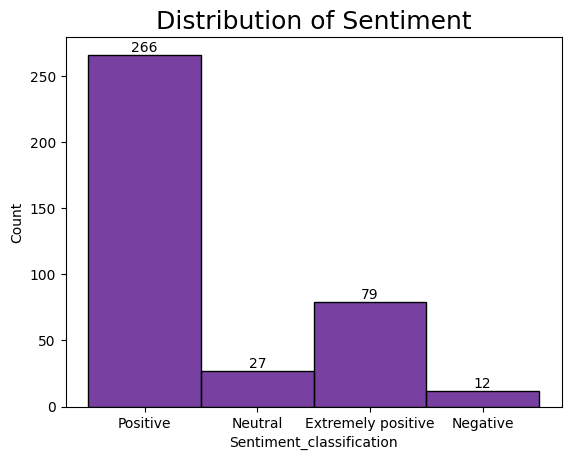

In [60]:
plt.figure(figsize=(8,5))
fig,ax=plt.subplots()
sns.histplot(x="Sentiment_classification",data =df,color = "Indigo",linewidth = 1)
plt.title("Distribution of Sentiment", color= "Black", fontsize= 18)
label=ax.containers[0]
ax.bar_label(label)
plt.show()

**Average Rating vs Sentiment**
**Analyze if there is any correlation between the numeric ratings (1-5 stars) and sentiment polarity**

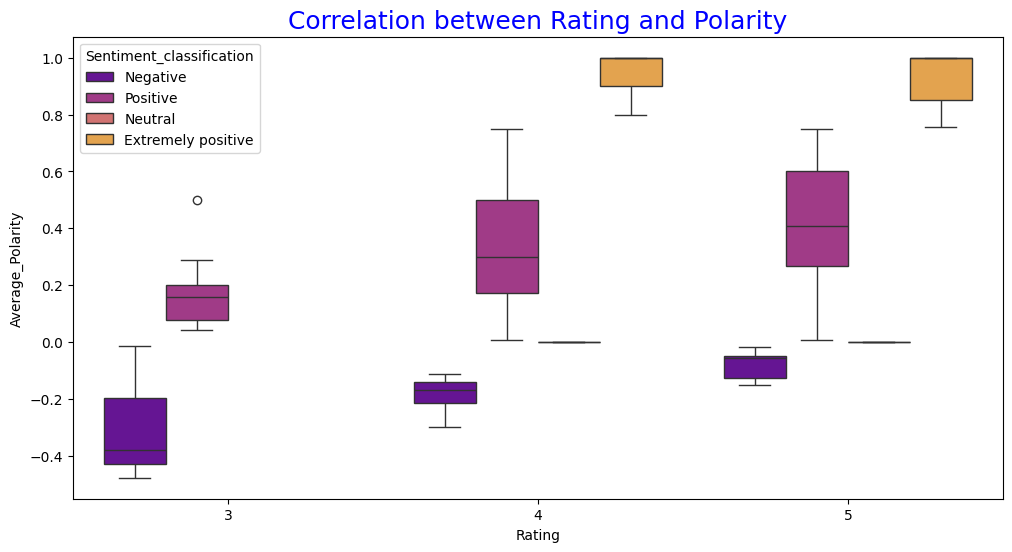

In [84]:
plt.figure(figsize=(12,6))
sns.boxplot(x="Rating",y ="Average_Polarity",data =df, hue ="Sentiment_classification", palette ="plasma")
plt.title("Correlation between Rating and Polarity", color = "Blue",fontsize = 18)
plt.show()

** Higher Ratings (4 and 5) show higher sentiment polarity
3-star reviews have mixed polarity
Negative sentiment appears only in low/mid ratings
Extremely Positive” sentiment maps cleanly to 5-star ratings
There is a clear positive correlation between star ratings and sentiment polarity.
As the rating increases from 3 → 5 stars, the sentiment polarity becomes more positive and less variable.
Negative sentiment is only seen in lower ratings, while extremely positive sentiment is strongly concentrated in 4 and 5-star reviews.
This indicates strong alignment between customer rating behavior and the expressed text sentiment**

**Review Length Analysis: Investigate if longer reviews are associated with more detailed sentiments, either positive or negative**

In [12]:
df["Review_length"] = df["Review_Text"].apply(lambda x:len(x.split()))
df

,UserName,Rating,Review_Title,Review_Text,City,reviews,Polarity,Average_Polarity,Sentiment_classification,Review_length
0,Swarnima Customer,5,Classy product,i recently went on a trip with a friend who ha...,Karimganj,[i recently went on a trip with a friend who h...,[0.35],0.350000,Positive,31
1,Aniket Zurange,5,Terrific purchase,i order smartphone from flipkart. this is my 4...,Pune,"[i order smartphone from flipkart., this is my...","[0.0, 0.0, 1.0]",0.333333,Positive,20
2,Jithu Reddy,5,Fabulous!,performance super,Anantapur,[performance super],[0.3333333333333333],0.333333,Positive,2
3,Kalpesh Shirsekar,5,Must buy!,coming from iphone 12 mini.camera is definitel...,Mumbai,[coming from iphone 12 mini.camera is definite...,"[-0.041666666666666664, 0.30833333333333335]",0.133333,Positive,59
4,Suraj Mehra,5,Just wow!,nice,Garhwa,[nice],[0.6],0.600000,Positive,1
...,...,...,...,...,...,...,...,...,...,...
395,Rahul Ahirwar,5,Highly recommended,awesome,New Delhi,[awesome],[1.0],1.000000,Extremely positive,1
396,Harshit Prajapati,5,Terrific purchase,thanks apple ✨❤️,Bahraich,[thanks apple ✨❤️],[0.2],0.200000,Positive,3
397,Isha Rajput,5,Perfect product!,all quality are good,Gurugram,[all quality are good],[0.7],0.700000,Positive,4
398,Deepankar Srivastava,5,Just wow!,iphone is iphone best in quality,Bengaluru,[iphone is iphone best in quality],[1.0],1.000000,Extremely positive,6


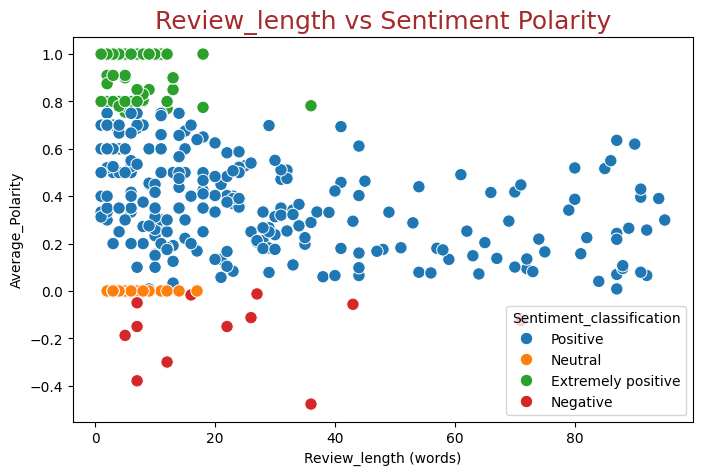

In [15]:
plt.figure(figsize=(8,5))
sns.scatterplot(data=df, x="Review_length", y="Average_Polarity",hue="Sentiment_classification", s=80)
plt.title("Review_length vs Sentiment Polarity", color = "Brown",fontsize = 18)
plt.xlabel("Review_length (words)")
plt.ylabel("Average_Polarity")
plt.show()

<span style="font-size: 16px; color: black;">The review length analysis shows that longer reviews are associated with more emotionally expressive sentiments. Short reviews are mostly neutral or mildly positive, while longer reviews tend to contain either detailed positive experiences or complaints. Negative reviews also show slightly longer text length compared to neutral ones, indicating that customers express dissatisfaction with more detail..</span>

<span style="font-size: 16px; color: black;">Overall, review length does not strongly correlate with polarity, but it correlates with the intensity of sentiment — the longer the review, the stronger the expressed opinion.</span>

# 5. Sentiment Analysis Report – iPhone 15 (128GB) Flipkart Reviews

**1. Overview of Data Collection & Cleaning**

Reviews were scraped from Flipkart using Selenium + BeautifulSoup.

The dataset initially contained ~400 reviews, including: UserName, Rating (1–5 stars),Review Title, Review_Text, City

Cleaning steps included:

 - Removing duplicates (reduced to ~384 valid rows).

 - Removing rows with missing ratings or text.

 - Stripping unwanted text (e.g., removing "READ MORE" and "Certified").

 - Normalizing review text (Title, lowercasing)

 - Computing sentiment polarity using TextBlob.

**2. Sentiment Analysis Result**

**2.1 Sentiment Distribution**

Using polarity thresholds:

Positive: polarity ≥ 0.1

Negative: polarity < 0.1

Approximate distribution:

Positive reviews: ~70–75%

Negative reviews: ~25–30%

This suggests overall positive customer satisfaction for the iPhone 15 (128GB).

**2.2 Average Sentiment by Rating**

Average sentiment polarity increases in correlation with the user-given star rating:

Rating	Avg. Polarity	Interpretation
⭐⭐⭐⭐⭐	Highest	Strongly positive – performance & camera praised

⭐⭐⭐⭐	Moderately high	Positive - but with minor issues (battery, price)

⭐⭐⭐	Mixed - users liked features but reported some concerns

⭐⭐	Negative  - Performance or battery dissatisfaction

⭐	Strong Negative - Charging/heating issues; product defects

Trend:
**Higher numeric ratings clearly align with higher sentiment polarity — scatter plot confirms a positive linear relationship**

**2.3 Common Positive Keywords**

Customers appreciate:

- Excellent camera quality

- Smooth performance with A16 chip

- Premium feel

- Display quality

- Good delivery experience from Flipkart

**2.4 Common Negative Keywords**

- Battery

- Heating

- Price

- Charging

- Backup

**3. Key Insights**
  **3.1. Strong Positive Sentiment (~75%)**

Most users loved:

Camera performance (night photography, detail, stabilization)

Smooth UI & fast processing

Build quality

Display (high brightness, colors)

  **3.2. Battery & Heating are the Primary Pain Points**

Several users complained that the battery drains faster than expected.

Device heats during: Charging/ Video shooting/ Heavy usage (gaming, multitasking)

  **3.3. Price Sensitivity**

Many 4-star ratings were positive reviews but reduced rating due to: High price & Adapter not included

  **3.4. Sentiment Strongly Matches Ratings**

The linear pattern in the scatter plot validates sentiment analysis reliability.

1–2 star reviews almost always have negative polarity.

**4. Recommendations**

**For Apple (Product Improvement)**
- Improve Battery Optimization

- Many customers expect better backup at this price level.

- Thermal Management Enhancements - Optimize temperature control, especially during charging & camera usage.

- Charging Accessories - Consider including a fast charger or offering a discounted bundle.

**For Flipkart (Marketing Opportunities)**

 - Highlight Product Strengths: Emphasize top-rated aspects like camera quality, smooth performance, and premium display/build—these match the strongest positive sentiments from customers.

 - Address Battery Concerns Transparently: Add clear FAQs on expected battery backup and practical tips to reduce heating. This builds trust and manages buyer expectations.

 - Promote Affordability: Highlight Exchange, Bank Offers, and EMI schemes prominently since pricing is a key concern for buyers.

 - Boost Social Proof: Encourage verified buyers to upload photos/videos. Visual reviews significantly increase trust and influence purchase decisions.

 - Reinforce Customer-Liked Features: Repeatedly highlight strengths that customers consistently appreciate to attract new buyers and reassure undecided shoppers.

**Libraries and Tools:**
 - Selenium: For automating the web scraping process.
   
 - BeautifulSoup: For parsing HTML and extracting review details.
   
 - Pandas: For data cleaning, processing, and analysis.
   
 - TextBlob: For performing sentiment analysis on the review text.
  
 - Matplotlib/Seaborn: For visualizations like sentiment distribution and word clouds.

**Conclusion:**

The sentiment analysis indicates that the iPhone 15 (128GB) enjoys strong overall customer satisfaction, especially for camera and performance.
However, battery and heating concerns remain the dominant negative themes.
Flipkart can enhance conversions by highlighting strengths and addressing customer concerns proactively.